# Roadside litter throwing detection

In [ ]:
#mount google drive (dataset is stored here)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#copy dataset to working dir
!cp -r "/content/drive/MyDrive/Colab Notebooks/waste/op" .
!mv op waste

In [ ]:
# !rm -r waste/op

rm: cannot remove 'waste/op': No such file or directory


In [ ]:
#import necessary libraries
import random
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# yaml config for Yolo dataset
text = """
path: /content/
train: /content/waste/train
val: /content/waste/validate

nc: 1
names:
    [
      "litter_throw"
    ]

"""
yaml_file = "./waste/data.yaml"

with open(yaml_file,"w") as f:
  # print(text)
  f.write(text)

In [ ]:
#Install Yolo v8
!pip install -U ultralytics --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 10.4 MB/s eta 0:00:00


In [ ]:
! yolo task=detect \
mode=train \
model=yolov8s.pt \
data=./waste/data.yaml \
epochs=300 \
batch = 4 \
imgsz=640

100% 21.5M/21.5M [00:00<00:00, 168MB/s]
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=./waste/data.yaml, epochs=300, time=None, patience=50, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/p1.jpg: 416x640 3 litter_throws, 118.4ms
Speed: 3.7ms preprocess, 118.4ms inference, 517.9ms postprocess per image at shape (1, 3, 416, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


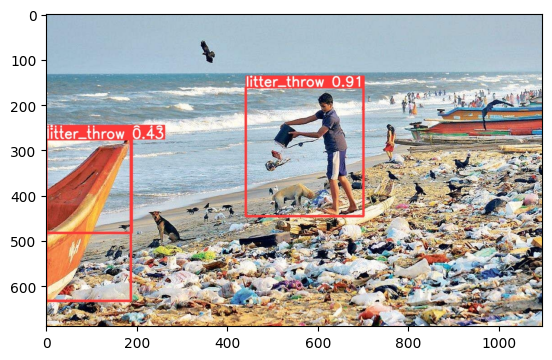

In [ ]:
!wget http://images.newindianexpress.com/uploads/user/imagelibrary/2018/4/25/original/Odaikuppam_unaware.jpg -O p1.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="p1.jpg"

plt.imshow(plt.imread("/content/runs/detect/predict/p1.jpg"))

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/p2.jpg: 448x640 5 litter_throws, 198.3ms
Speed: 4.2ms preprocess, 198.3ms inference, 800.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


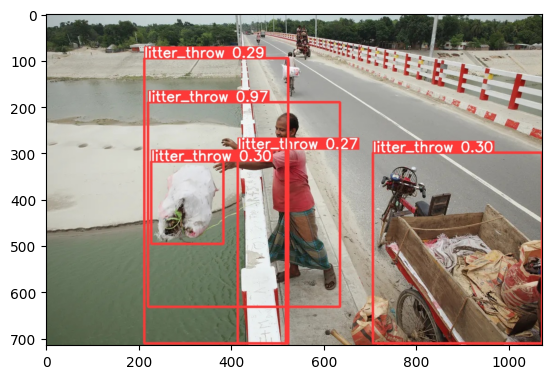

In [ ]:
!wget https://th-thumbnailer.cdn-si-edu.com/Vw50qWO6919_jhAclAYJOZcmYRY=/fit-in/1072x0/https://tf-cmsv2-photocontest-smithsonianmag-prod-approved.s3.amazonaws.com/8fbabc1b-7aa2-4679-b9a4-4e8ae4ec86cb.jpg -O p2.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="p2.jpg"

plt.imshow(plt.imread("/content/runs/detect/predict2/p2.jpg"))

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/p3.jpg: 448x640 4 litter_throws, 251.7ms
Speed: 11.7ms preprocess, 251.7ms inference, 811.7ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


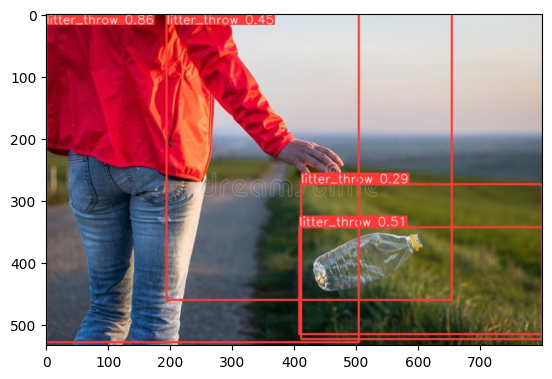

In [ ]:
!wget https://thumbs.dreamstime.com/b/hand-throwing-away-plastic-bottle-nature-environmental-damage-waste-woman-outdoors-181309288.jpg -O p3.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="p3.jpg"

plt.imshow(plt.imread("/content/runs/detect/predict3/p3.jpg"))

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/p4.jpg: 384x640 2 litter_throws, 126.6ms
Speed: 3.3ms preprocess, 126.6ms inference, 532.1ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict4
💡 Learn more at https://docs.ultralytics.com/modes/predict


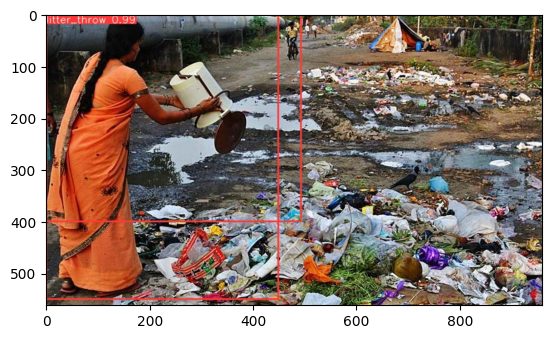

In [ ]:
!wget http://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2017/06/12/Pictures/garbage_4d405e66-4f4d-11e7-88ef-5a5d74cf2589.jpg -O p4.jpg -q
!yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="p4.jpg"

plt.imshow(plt.imread("/content/runs/detect/predict4/p4.jpg"))

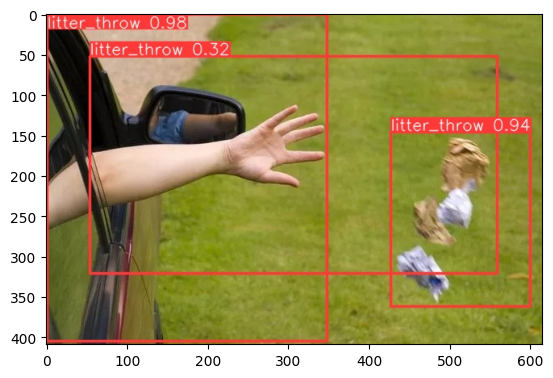

In [ ]:
# !wget https://i2-prod.mirror.co.uk/incoming/article9586083.ece/ALTERNATES/s615/PROD-Pollution.jpg -O p6.jpg -q
# !yolo task=detect mode=predict model="runs/detect/train/weights/best.pt" source="p6.jpg" nms=True

plt.imshow(plt.imread("/content/runs/detect/predict8/p6.jpg"))

**With just 60 labels, Results looks promising
 Will tweak NMS, IOU, confidence in production to reduct multiple and false prediction***